In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("... loading data")
with open('data/mnist.pkl', 'rb')as f:
  train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

... loading data


In [2]:
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns=['label'])
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns=['label'])

In [3]:
from sklearn.decomposition import PCA

PCA_model = PCA(n_components=2).fit(train_x)
PCA_train_x = PCA_model.transform(train_x)
PCA_test_x = PCA_model.transform(test_x)

In [4]:
print('PCA_train_x shape: ', PCA_train_x.shape)
print('PCA_test_x shape: ', PCA_test_x.shape)

PCA_train_x shape:  (50000, 2)
PCA_test_x shape:  (10000, 2)


Text(0, 0.5, 'Principal Component 2')

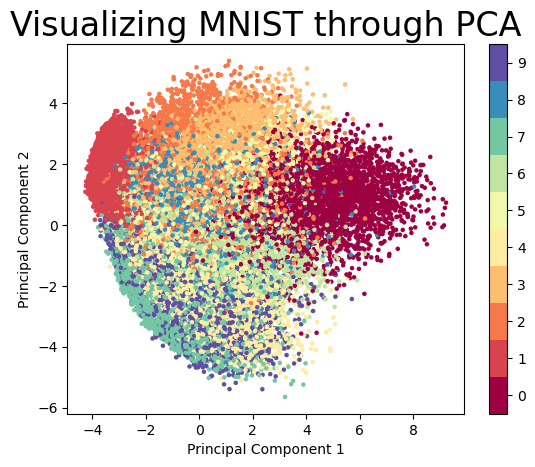

In [6]:
## Plot on the graph
plt.scatter(PCA_train_x[:,0], PCA_train_x[:,1], s=5, c=train_y['label'], cmap="Spectral")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title("Visualizing MNIST through PCA", fontsize = 24)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

In [8]:
sub_PCA_train_x = PCA_train_x[: 1000 : ]
print('sub_PCA_train_x.shape: ', sub_PCA_train_x.shape)

sub_PCA_test_x = PCA_test_x[:100 : ]
print('sub_PCA_test_x.shape: ', sub_PCA_test_x.shape)

sub_PCA_train_x.shape:  (1000, 2)
sub_PCA_test_x.shape:  (100, 2)


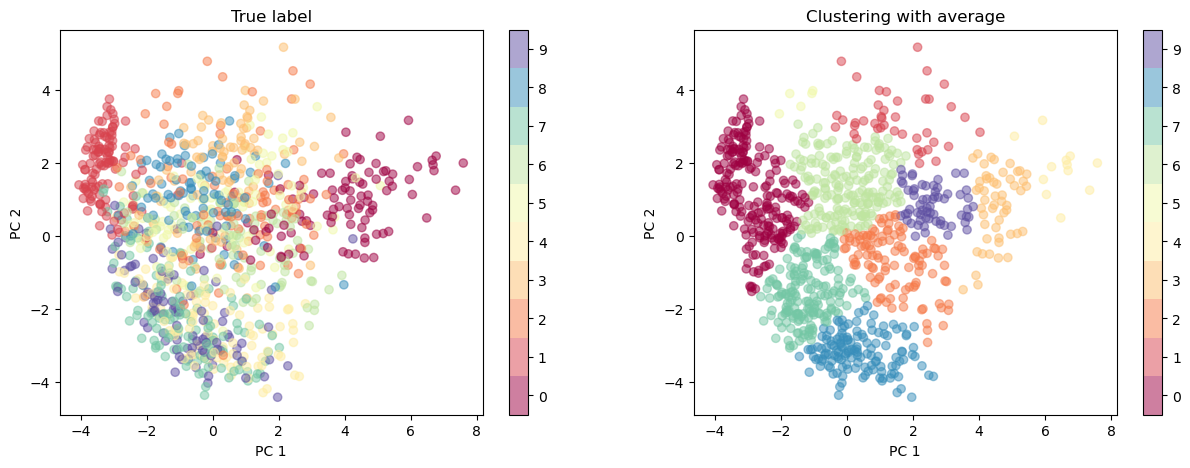

In [9]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

li = 'average' # Linkage('')
n_c = 10
hier = AgglomerativeClustering(n_clusters=n_c, metric='euclidean', linkage=li)
pred_y = hier.fit_predict(sub_PCA_train_x)

## Plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(sub_PCA_train_x[:,0], sub_PCA_train_x[:, 1], c=train_y['label'][:1000], cmap="Spectral", alpha=0.5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("True label")
plt.xlabel("PC 1"); plt.ylabel("PC 2")

plt.subplot(1,2,2)
plt.scatter(sub_PCA_train_x[:,0], sub_PCA_train_x[:, 1], c=pred_y, cmap="Spectral", alpha=0.5)
plt.colorbar(boundaries=np.arange(n_c+1)-0.5).set_ticks(np.arange(n_c))
plt.title("Clustering with "+ li)
plt.xlabel("PC 1"); plt.ylabel("PC 2")

plt.show()